In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
%matplotlib inline
import sys
sys.path.append("..")
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore

In [3]:
U=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_U_ep_pytorch.npy')
V=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_V_ep_pytorch.npy').T
data = io.loadmat('/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp)
X=zscore(X).T
print(X.shape)
print(V.shape)
print(U.shape)

/home/maria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:138: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)


(10103, 5880)
(150, 5880)
(10103, 150)


In [4]:
print(np.nonzero(U[:,0]))
print(np.corrcoef(V[0],X[9,:]))

(array([    2,     3,     9, ..., 10091, 10099, 10100]),)
[[1.         0.15014416]
 [0.15014416 1.        ]]


(804,)
804
[0.11560887269115404, 0.21597096782418473, 0.1097237722709746, 0.08243467156001637, 0.16288977513153607, 0.16155560102002697, 0.21493177235642688, 0.1064076798148208, 0.10052708324297882, 0.11713334730880881, 0.26346138540352015, 0.10066819872089516, 0.16273376502732878, 0.32880954202913887, 0.06511882978486783, 0.21207369562269357, 0.1967279917209678, 0.15875420607746207, 0.11037211829985734, 0.13313922412642906, 0.21644135497939437, 0.20823632578210025, 0.2893653263873025, 0.12233202502570198, 0.16988782013865364, 0.1205917496714123, 0.2234603809758091, 0.14868208505449831, 0.24107920382701298, 0.15013277992415788, 0.10916501165176491, 0.12220255385161069, 0.14425701829881038, 0.10928417852333192, 0.23606688464568756, 0.12654697994736822, 0.07481110118259375, 0.09924172210931315, 0.1649245662220394, 0.1468556970902945, 0.1722232960140491, 0.16103376591304455, 0.15429236928242912, 0.13577318107924946, 0.11095145772313043, 0.27502263828659257, 0.10957926401168934, 0.20429919

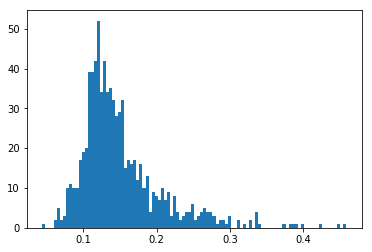

In [7]:
corr_lst=[]
ensemble_ind=5
ensemble_neurons=np.nonzero(U[:,ensemble_ind])[0]
for j in range(0,ensemble_neurons.shape[0]):
    #print(X[ensemble_neurons[ensemble_ind],:])
    #print(ensemble_neurons[j])
    corr_lst.append(np.corrcoef(V[ensemble_ind,:],X[ensemble_neurons[j],:])[0,1])
    
plt.hist(corr_lst,bins=100)
print(ensemble_neurons.shape)
print(len(corr_lst))
print(corr_lst)